## Name : A Sai Kumar Reddy
## Regd No: 22227
## Restaurant_Prediction

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sl

## Importing Dataset


In [83]:
data = pd.read_csv('E:/Acturail Project/ml project/restaurant-revenue-prediction/train.csv/train.csv')
data.head()




,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


## Data Preprocessing

In [84]:
data["Open Date"] = pd.to_datetime(data["Open Date"],format = "%m/%d/%Y")
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [85]:
data["Open Date"] = data["Open Date"].dt.strftime('%Y')
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [86]:
#converting years to float
data["Open Date"] = data["Open Date"].astype("float")
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999.0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008.0,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013.0,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012.0,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009.0,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008.0,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006.0,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006.0,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010.0,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [87]:

data.isna().any()

Id            False
Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool

In [88]:
class_columns=list(data.select_dtypes(include=['object']).columns)
#class_columns.remove('City')
class_columns


['City', 'City Group', 'Type']

In [89]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for c in class_columns:
    data[c]= label_encoder.fit_transform(data[c])
    data[c].unique()
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999.0,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008.0,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013.0,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012.0,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009.0,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008.0,29,1,1,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006.0,32,0,1,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006.0,18,1,1,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010.0,31,0,1,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [90]:
df = data.corr(method ='pearson')
df = df['revenue']
df = df.drop('revenue')

In [41]:
df.max()
df

Id           -0.006277
Open Date    -0.326140
City          0.266076
City Group   -0.237403
Type         -0.090532
P1            0.070217
P2            0.191518
P3           -0.024613
P4            0.035685
P5           -0.028191
P6            0.139094
P7            0.051165
P8           -0.084215
P9           -0.050352
P10          -0.073220
P11           0.084247
P12          -0.062193
P13          -0.105085
P14           0.006441
P15           0.000742
P16          -0.037997
P17           0.067137
P18          -0.034537
P19           0.027984
P20           0.014147
P21           0.097411
P22           0.083562
P23           0.045507
P24           0.014222
P25           0.036365
P26          -0.007650
P27          -0.013680
P28           0.155534
P29          -0.114846
P30          -0.066203
P31          -0.040418
P32          -0.065857
P33          -0.032426
P34          -0.072343
P35          -0.050156
P36          -0.050534
P37          -0.019051
Name: revenue, dtype: float64

In [91]:
#data["City"] = data["City"] / data["City"].abs().max()
#data["revenue"] = data["revenue"] / data["revenue"].abs().max()
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999.0,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008.0,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013.0,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012.0,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009.0,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008.0,29,1,1,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006.0,32,0,1,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006.0,18,1,1,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010.0,31,0,1,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [92]:

X = data.iloc[:,2]
y = data.iloc[:,-1]
X = np.asarray(X)
y = np.asarray(y)
y= y.reshape(-1,1)
X = X.reshape(-1,1)

X

array([[31],
       [ 3],
       [10],
       [28],
       [14],
       [ 3],
       [31],
       [31],
       [ 1],
       [11],
       [19],
       [31],
       [ 3],
       [31],
       [ 8],
       [31],
       [31],
       [31],
       [32],
       [25],
       [12],
       [31],
       [18],
       [25],
       [31],
       [13],
       [ 3],
       [ 8],
       [31],
       [ 3],
       [25],
       [31],
       [33],
       [26],
       [31],
       [ 0],
       [ 3],
       [ 3],
       [31],
       [31],
       [31],
       [31],
       [31],
       [ 3],
       [ 3],
       [ 4],
       [32],
       [32],
       [18],
       [31],
       [ 3],
       [17],
       [30],
       [26],
       [23],
       [31],
       [31],
       [ 4],
       [31],
       [31],
       [ 3],
       [31],
       [25],
       [22],
       [31],
       [32],
       [20],
       [31],
       [31],
       [20],
       [31],
       [31],
       [32],
       [ 3],
       [31],
       [31],
       [31],

## Simple linear Regression

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [94]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred = regressor.predict(X_test)
type(y_pred)

numpy.ndarray

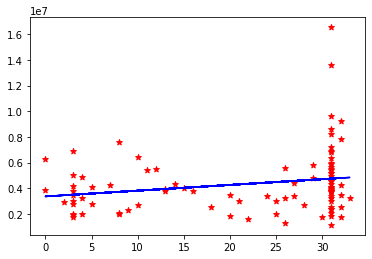

In [96]:
plt.scatter(X_train, y_train, color = 'red',marker='*')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

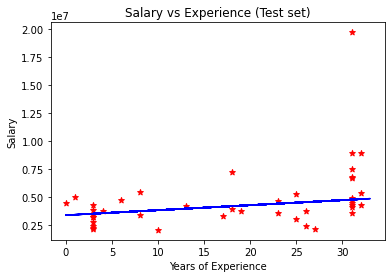

In [97]:
plt.scatter(X_test, y_test, color = 'red',marker='*')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [98]:
accuracy = np.subtract(y_pred,y_test)
accuracy = np.square(accuracy)
accuracy*=100
accuracy


array([[1.53031067e+14],
       [2.36415771e+14],
       [1.42141702e+13],
       [1.34587535e+13],
       [5.95732758e+13],
       [7.48936961e+14],
       [4.84655891e+12],
       [1.81814012e+14],
       [4.14607873e+12],
       [1.71865239e+15],
       [1.34085685e+14],
       [6.16163788e+14],
       [6.33596356e+12],
       [2.91342620e+14],
       [6.34400089e+13],
       [1.55162559e+12],
       [4.12567468e+12],
       [2.22572345e+13],
       [1.20471761e+14],
       [3.05423407e+13],
       [1.15267218e+13],
       [2.85499730e+13],
       [4.09659326e+14],
       [4.67987187e+14],
       [6.09622329e+13],
       [9.15394666e+14],
       [7.11895696e+12],
       [2.23159328e+16],
       [1.25583908e+14],
       [2.26465137e+13],
       [3.10671604e+14],
       [7.36868584e+13],
       [1.25360087e+14],
       [1.67395028e+15],
       [2.19490339e+14],
       [3.74955304e+14],
       [2.45596732e+12],
       [3.86878695e+13],
       [5.77134576e+13],
       [6.88502654e+13],


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999.0,31,0,2,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008.0,3,0,1,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013.0,10,1,2,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012.0,28,1,2,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009.0,14,1,2,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008.0,29,1,1,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,2006.0,32,0,1,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,2006.0,18,1,1,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,2010.0,31,0,1,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


## Multiple  Linear Regression

In [19]:
X = data.iloc[:,2]
y = data.iloc[:,-1]
X = np.asarray(X)
y = np.asarray(y)
y= y.reshape(-1,1)
X = X.reshape(-1,1)

X

array([[0.93939394],
       [0.09090909],
       [0.3030303 ],
       [0.84848485],
       [0.42424242],
       [0.09090909],
       [0.93939394],
       [0.93939394],
       [0.03030303],
       [0.33333333],
       [0.57575758],
       [0.93939394],
       [0.09090909],
       [0.93939394],
       [0.24242424],
       [0.93939394],
       [0.93939394],
       [0.93939394],
       [0.96969697],
       [0.75757576],
       [0.36363636],
       [0.93939394],
       [0.54545455],
       [0.75757576],
       [0.93939394],
       [0.39393939],
       [0.09090909],
       [0.24242424],
       [0.93939394],
       [0.09090909],
       [0.75757576],
       [0.93939394],
       [1.        ],
       [0.78787879],
       [0.93939394],
       [0.        ],
       [0.09090909],
       [0.09090909],
       [0.93939394],
       [0.93939394],
       [0.93939394],
       [0.93939394],
       [0.93939394],
       [0.09090909],
       [0.09090909],
       [0.12121212],
       [0.96969697],
       [0.969

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [100]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [101]:

y_pred = regressor.predict(X_test)
y_pred

array([[3504482.26163888],
       [3414915.22776887],
       [3728399.8463139 ],
       [3504482.26163888],
       [3504482.26163888],
       [4758420.73581898],
       [4176235.01566393],
       [3504482.26163888],
       [3549265.77857389],
       [4758420.73581898],
       [4758420.73581898],
       [4579286.66807897],
       [4400152.60033895],
       [3728399.8463139 ],
       [4489719.63420896],
       [4758420.73581898],
       [3952317.43098892],
       [4758420.73581898],
       [3370131.71083387],
       [4803204.25275398],
       [3504482.26163888],
       [4803204.25275398],
       [4758420.73581898],
       [4534503.15114396],
       [4534503.15114396],
       [4176235.01566393],
       [4758420.73581898],
       [4758420.73581898],
       [3504482.26163888],
       [4221018.53259894],
       [3817966.88018391],
       [4131451.49872893],
       [3638832.81244389],
       [4803204.25275398],
       [4489719.63420896],
       [4758420.73581898],
       [3504482.26163888],
 

In [102]:

y_test

array([[ 2267425.],
       [ 4952497.],
       [ 3351383.],
       [ 3871344.],
       [ 2732645.],
       [ 7495092.],
       [ 3956086.],
       [ 2156098.],
       [ 3752885.],
       [ 8904084.],
       [ 3600467.],
       [ 2097022.],
       [ 4651866.],
       [ 5435276.],
       [ 5286212.],
       [ 4882985.],
       [ 4155435.],
       [ 4286645.],
       [ 4467728.],
       [ 4250553.],
       [ 3164972.],
       [ 5337526.],
       [ 6782425.],
       [ 2371202.],
       [ 3753720.],
       [ 7201784.],
       [ 4491607.],
       [19696939.],
       [ 2383840.],
       [ 3745135.],
       [ 2055379.],
       [ 3273041.],
       [ 4758476.],
       [ 8894598.],
       [ 3008199.],
       [ 6694797.],
       [ 3347767.],
       [ 4136425.],
       [ 4264176.],
       [ 3570392.],
       [ 3199619.],
       [ 4807746.]])

In [103]:
def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of MSE
  print(f"Mean Squared error is: {metrics.mean_squared_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [104]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 1462653.82783935
Mean Squared error is: 7558601787671.119
Root Mean Square error is: 2749291.142762279
R2 score is: 0.08153417061474388


## Polynomial Regression


In [105]:

X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [106]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

# Create polynomial features up to degree 3
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

# Train a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict the output variable using the trained model
y_pred = model.predict(X_poly)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2 score: {r2}")

RMSE: 4150054.1822909317
R^2 score: -1.614407822895208


# Decison Tree Regression


In [107]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset and split into X (independent variables) and y (dependent variable)
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree regression model
model = DecisionTreeRegressor(max_depth=5) # Set max_depth to avoid overfitting
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

Emetrics(y_test,y_pred)
     

Mean Absoulute error is : 1737753.1288690476
Mean Squared error is: 9635491083842.768
Root Mean Square error is: 3104108.7422709223
R2 score is: 0.21239659898291008


## Random Forest Regression

In [108]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

# Splitting the data into training and testing sets
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

Emetrics(y_test,y_pred)
     

Mean Absoulute error is : 1587966.8740476193
Mean Squared error is: 9095937708671.664
Root Mean Square error is: 3015947.232408363
R2 score is: -0.10527161058524181


## 5) Specific to Random Forest Algorithm -
## a. Find the importance of each of the features and visualize them
## b. Build a new model by only taking the most important metrics
## c. Compare the results of both the models

In [109]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
     

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
     

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
     

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
print(X_train_fs) 
print(X_test_fs)
print(fs)
     

[[2.012e+03 3.100e+01 0.000e+00 ... 3.000e+00 1.600e+01 4.000e+00]
 [2.011e+03 8.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.009e+03 3.100e+01 0.000e+00 ... 4.000e+00 3.000e+00 2.000e+00]
 ...
 [2.011e+03 8.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.002e+03 3.100e+01 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.004e+03 1.000e+01 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
[[2.008e+03 5.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.007e+03 0.000e+00 1.000e+00 ... 4.000e+00 3.000e+00 2.000e+00]
 [2.013e+03 3.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [1.997e+03 3.100e+01 0.000e+00 ... 3.000e+00 1.600e+01 6.000e+00]
 [2.012e+03 2.700e+01 1.000e+00 ... 5.000e+00 5.000e+00 3.000e+00]
 [2.004e+03 3.000e+00 0.000e+00 ... 4.000e+00 3.000e+00 4.000e+00]]
SelectKBest(k='all', score_func=<function f_regression at 0x000002A0B3238CA0>)


In [110]:
import matplotlib.pyplot as plt

Feature 0: 8.006025
Feature 1: 4.286821
Feature 2: 5.929546
Feature 3: 0.002774
Feature 4: 1.721350
Feature 5: 4.487415
Feature 6: 0.136626
Feature 7: 0.687543
Feature 8: 0.573747
Feature 9: 1.620763
Feature 10: 0.581713
Feature 11: 0.310633
Feature 12: 0.077540
Feature 13: 0.026619
Feature 14: 2.003199
Feature 15: 0.439278
Feature 16: 0.175751
Feature 17: 0.487200
Feature 18: 0.298655
Feature 19: 0.007197
Feature 20: 2.660136
Feature 21: 0.003618
Feature 22: 1.224984
Feature 23: 0.162610
Feature 24: 7.580262
Feature 25: 5.194988
Feature 26: 1.543564
Feature 27: 0.473326
Feature 28: 1.181980
Feature 29: 0.224710
Feature 30: 0.034118
Feature 31: 6.507853
Feature 32: 1.172447
Feature 33: 0.412707
Feature 34: 0.004072
Feature 35: 0.201927
Feature 36: 0.103626
Feature 37: 0.376272
Feature 38: 0.000964
Feature 39: 0.061627
Feature 40: 0.013931


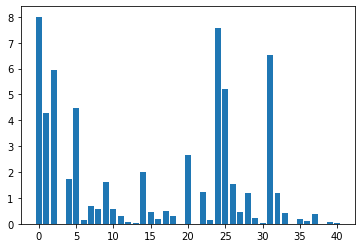

In [111]:

# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [112]:
cols = data.iloc[:, [0, 1,3,4,12,14,15,19,25,42]]
cols


     

,Id,Open Date,City Group,Type,P8,P10,P11,P15,P21,revenue
0,0,1999.0,0,2,4,5,3,2,1,5653753.0
1,1,2008.0,0,1,5,5,1,0,1,6923131.0
2,2,2013.0,1,2,5,5,2,0,1,2055379.0
3,3,2012.0,1,2,8,10,8,4,6,2675511.0
4,4,2009.0,1,2,5,5,2,1,1,4316715.0
...,...,...,...,...,...,...,...,...,...,...
132,132,2008.0,1,1,4,4,4,0,2,5787594.0
133,133,2006.0,0,1,4,5,5,0,2,9262754.0
134,134,2006.0,1,1,5,5,1,0,1,2544857.0
135,135,2010.0,0,1,5,5,2,0,1,7217634.0


In [113]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

# Splitting the data into training and testing sets
X = cols.iloc[:, 0:-1].values
y = cols.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predicting the target values
y_pred = rf_model.predict(X_test)

In [114]:

Emetrics(y_test,y_pred)

Mean Absoulute error is : 1623476.258809524
Mean Squared error is: 7962641915607.505
Root Mean Square error is: 2821815.3581706057
R2 score is: 0.03243817883815425
